In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import networkx as nx

import network_utils as ne

In [2]:
SAVEFIG = False # saves generated figures to ./figure directory if TRUE
TITLEFONT = {'fontname': 'arial', 'size': 14}
LABELFONT = {'fontname': 'arial', 'size': 14}
LEGENDFONT = {'family': 'arial', 'size': 12}
TICKPARAM = {'family': 'arial', 'size': 12}

In [3]:
# load data (data include both TEC and RNA)
with pd.HDFStore('./data/gene_network_data.h5') as store:
    tec = store['TEC']
np_tec_abs = np.abs(tec.to_numpy(copy=True))

#### Figure 1a: Multi-vertex connected components by thresholds

In [4]:
thresholds = [0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]
num_cc = [] # number of connected components
isolated_nodes = [] # number of nodes without connections
for th in thresholds:
    curr_al = ne.threshold_adjacency_list(np_tec_abs, th) # generate unweighted adjacency list
    cc, iso_nodes = ne.connected_components(curr_al)
    num_cc.append(cc)
    isolated_nodes.append(iso_nodes)
print(num_cc)
print(isolated_nodes)

[28, 91, 180, 188, 143, 99, 49, 14, 3]
[10908, 10441, 9186, 7284, 5120, 3140, 1632, 604, 135]


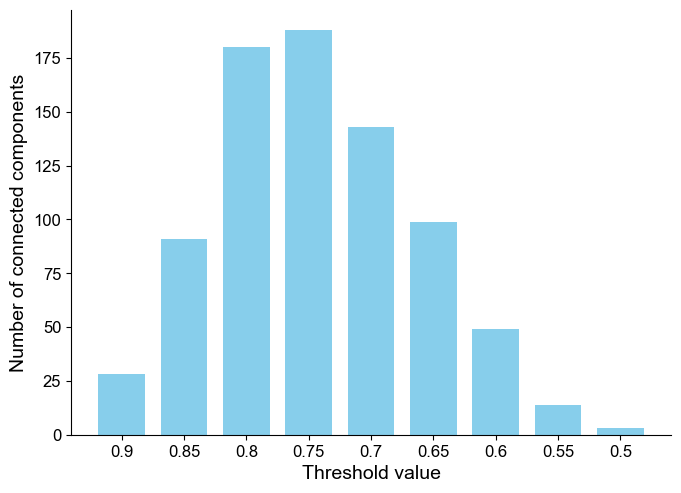

In [5]:
n = len(num_cc)
x = np.arange(n)
bar_width = 0.75

# plot figure
plt.figure(figsize=(6, 4.25))
plt.bar(x, num_cc, width=bar_width, color="skyblue")

# adjust display
plt.xticks(x, thresholds, **TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1a.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Threshold value", **LABELFONT)
    plt.ylabel('Number of connected components', **LABELFONT)
plt.show()

#### Figure 1b: Number of connected nodes and edges by thresholds

In [6]:
num_nodes = []
num_edges = []
for th in thresholds:
    curr_al = ne.threshold_adjacency_list(np_tec_abs, th)
    n_nodes, n_edges = ne.nodes_and_edges(curr_al)
    num_nodes.append(n_nodes)
    num_edges.append(n_edges)
print("Nodes: ", num_nodes)
print("Edges: ", num_edges)

Nodes:  [180, 647, 1902, 3804, 5968, 7948, 9456, 10484, 10953]
Edges:  [1731, 3920, 9901, 26878, 67967, 154342, 323483, 636849, 1199707]


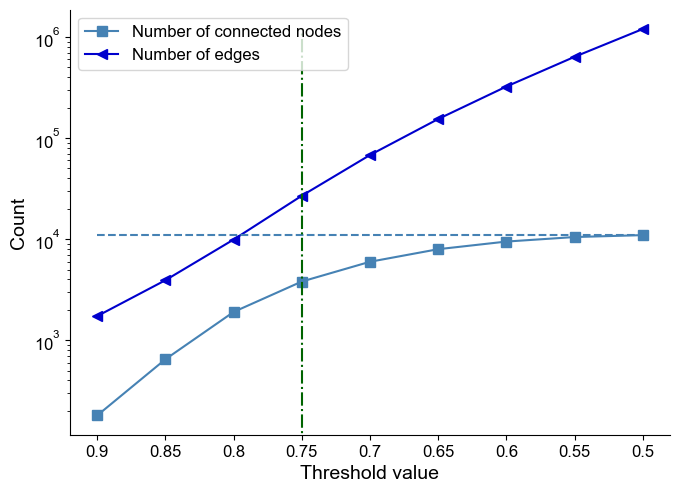

In [7]:
n = len(num_nodes)
x = np.arange(n)

# plot figure
plt.figure(figsize=(6, 4.25))
plt.plot(x, num_nodes, marker='s', markersize=7, label='Number of connected nodes', color='steelblue')
plt.plot(x, num_edges, marker='<', markersize=7,  label='Number of edges', color='mediumblue')
plt.hlines([11088], xmin=0, xmax=n-1, linestyles='--', color='steelblue') # max number of nodes
plt.vlines([3], ymin=0, ymax=max(num_edges), linestyles='-.', color='darkgreen')
plt.yscale('log')
plt.legend(prop=LEGENDFONT)

# adjust display
plt.xticks(x, thresholds, **TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1b.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Threshold value", **LABELFONT)
    plt.ylabel('Count', **LABELFONT)
plt.show()

#### Figure 1c: Degree distribution with threshold = 0.75

In [8]:
THRESHOLD = 0.75
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, THRESHOLD)
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)
tec_degree_sequence = sorted((d for n, d in tec_graph_75.degree()), reverse=True)
max_degree = max(tec_degree_sequence)

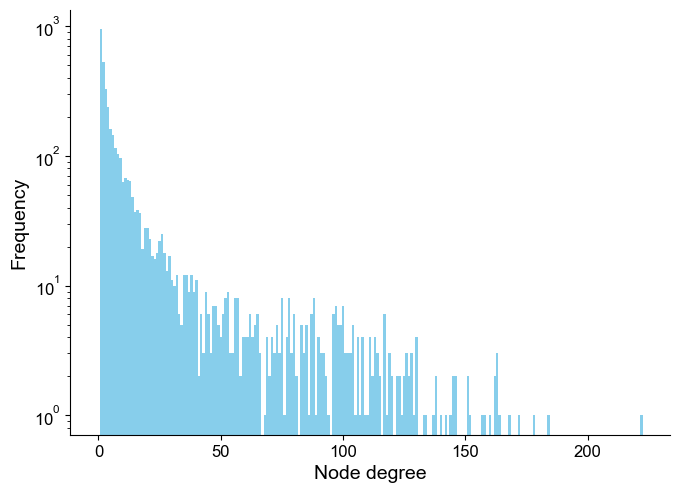

In [9]:
# plot figure
plt.figure(figsize=(6, 4.25))
plt.hist(tec_degree_sequence, bins=range(0, max_degree + 2), color='skyblue', edgecolor='none', align='left')
plt.yscale('log')

# adjust display
plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1c.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel('Node degree', **LABELFONT)
    plt.ylabel('Frequency', **LABELFONT)
plt.show()

#### Figure 1d: Second largest TEC connected component (35 nodes)

In [10]:
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, 0.75)
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)

connected_components = nx.connected_components(tec_graph_75)
connected_components = sorted(connected_components, key=len, reverse=True)
tec_visual_cc = connected_components[1] # get second largest connected component

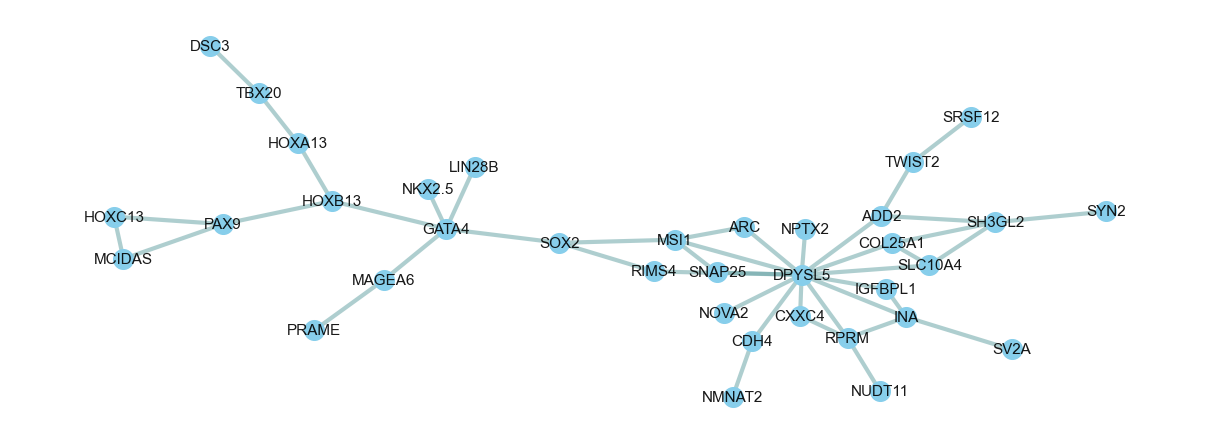

In [11]:
tec_visual_cc = tec_graph_75.subgraph(tec_visual_cc)
pos = nx.kamada_kawai_layout(tec_visual_cc) # layout organization algorithm
node_option = {"node_color": "skyblue", "node_size": 200}
edge_option = {"edge_color": "cadetblue", "alpha": 0.5, "width": 3}

plt.figure(figsize=(12, 4.25))
nx.draw_networkx_nodes(tec_visual_cc, pos, **node_option)
nx.draw_networkx_edges(tec_visual_cc, pos, **edge_option)
labels = {node: tec_visual_cc.nodes[node]['name'] for node in tec_visual_cc.nodes()} # get mapping of node idx to its name
nx.draw_networkx_labels(tec_visual_cc, pos, labels, font_size=11, font_color="black", font_family='arial', alpha=0.9)
plt.box(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1d.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()

#### Figure 1e: Scale-free properties of TEC network

In [12]:
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, 0.75)
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)

# generate Barabasi Albert model
n = nx.number_of_nodes(tec_graph_75)
ba_m = nx.number_of_edges(tec_graph_75) // nx.number_of_nodes(tec_graph_75)
G_barabasi_albert = nx.barabasi_albert_graph(n, ba_m)

print(f"TEC Network: {n} nodes with {nx.number_of_edges(tec_graph_75)} edges")
print(f"Barabasi Albert Network: {nx.number_of_nodes(G_barabasi_albert)} nodes with {nx.number_of_edges(G_barabasi_albert)} edges")

TEC Network: 3804 nodes with 26878 edges
Barabasi Albert Network: 3804 nodes with 26579 edges


In [13]:
# calculate coefficient of determiation for both networks for scale-free analysis
tec_r2 = round(ne.scale_free_r2(tec_graph_75), 2)
ba_r2 = round(ne.scale_free_r2(G_barabasi_albert), 2)

tec_deg_distr = [tec_graph_75.degree(n) for n in tec_graph_75.nodes()]
tec_unique_degs, tec_counts = np.unique(tec_deg_distr, return_counts=True)
tec_deg_prob = np.array([c / n for c in tec_counts])
# ensure there are no 0s
tec_unique_degs = tec_unique_degs[((tec_unique_degs > 0) & (tec_deg_prob > 0))]
tec_deg_prob = tec_deg_prob[((tec_unique_degs > 0) & (tec_deg_prob > 0))]

ba_deg_distr = [G_barabasi_albert.degree(n) for n in G_barabasi_albert.nodes()]
ba_unique_degs, ba_counts = np.unique(ba_deg_distr, return_counts=True)
ba_deg_prob = np.array([c / n for c in ba_counts])
# ensure there are no 0s
ba_unique_degs = ba_unique_degs[((ba_unique_degs > 0) & (ba_deg_prob > 0))]
ba_deg_prob = ba_deg_prob[((ba_unique_degs > 0) & (ba_deg_prob > 0))]

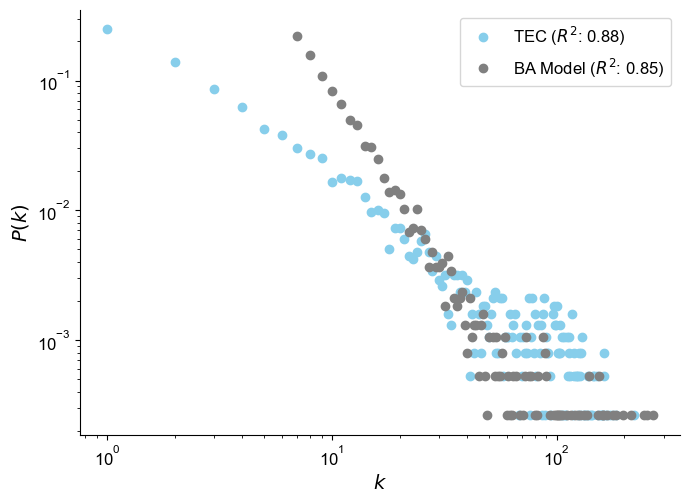

In [14]:
plt.figure(figsize=(6, 4.25))
plt.loglog(tec_unique_degs, tec_deg_prob, marker="o", linestyle="None", color='skyblue', label=f"TEC ($R^2$: {tec_r2})")
plt.loglog(ba_unique_degs, ba_deg_prob, marker="o", linestyle="None", color='gray', label=f"BA Model ($R^2$: {ba_r2})")
plt.legend(prop=LEGENDFONT)

plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1e.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("$k$", **LABELFONT)
    plt.ylabel("$P(k)$", **LABELFONT)
plt.show()

#### Figure 1f: TEC network clustering coefficient

In [15]:
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, 0.75)
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)

# generate Watts Strogatz model
ws_k = sum(dict(tec_graph_75.degree()).values()) // tec_graph_75.number_of_nodes()
ws_p = 0.01 
G_watts_strogatz = nx.watts_strogatz_graph(tec_graph_75.number_of_nodes(), ws_k, ws_p)

# generate random graph
degree_sequence = [d for n, d in tec_graph_75.degree()]
G_rand = nx.expected_degree_graph(degree_sequence, selfloops=False)

In [16]:
degrees = dict(tec_graph_75.degree())
clustering = nx.clustering(tec_graph_75)
tec_x = [degrees[node] for node in tec_graph_75.nodes()]
tec_y = [clustering[node] for node in tec_graph_75.nodes()]

degrees = dict(G_rand.degree())
clustering = nx.clustering(G_rand)
rand_x = [degrees[node] for node in G_rand.nodes()]
rand_y = [clustering[node] for node in G_rand.nodes()]

degrees = dict(G_watts_strogatz.degree())
clustering = nx.clustering(G_watts_strogatz)
ws_x = [degrees[node] for node in G_watts_strogatz.nodes()]
ws_y = [clustering[node] for node in G_watts_strogatz.nodes()]

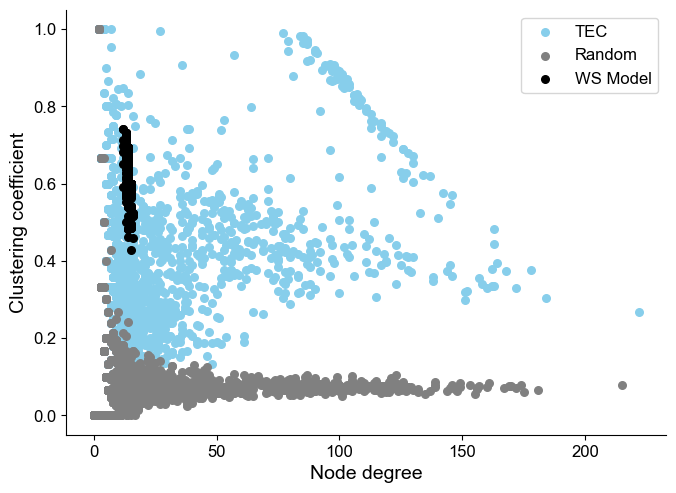

In [17]:
plt.figure(figsize=(6, 4.25))
plt.scatter(tec_x, tec_y, alpha=1, s=30, color='skyblue', label="TEC")
plt.scatter(rand_x, rand_y, alpha=1, s=30, color='grey', label='Random')
plt.scatter(ws_x, ws_y, alpha=1, s=30, color='black', label='WS Model')
plt.legend(prop=LEGENDFONT)

plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1f.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Node degree", **LABELFONT)
    plt.ylabel("Clustering coefficient", **LABELFONT)
plt.show()

#### Figure1g: TEC network rich-club coefficient

In [18]:
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, 0.75)
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)

# generate random graph
degree_sequence = [d for n, d in tec_graph_75.degree()]
G_rand = nx.expected_degree_graph(degree_sequence, selfloops=False)

In [19]:
rich_club = nx.rich_club_coefficient(tec_graph_75, normalized=False)
rand_rich_club = nx.rich_club_coefficient(G_rand, normalized=False)

degrees = sorted(rich_club.keys())
coeffs = [rich_club[k] for k in degrees]

rand_degrees = sorted(rand_rich_club.keys())
rand_coeffs = [rand_rich_club[k] for k in rand_degrees]

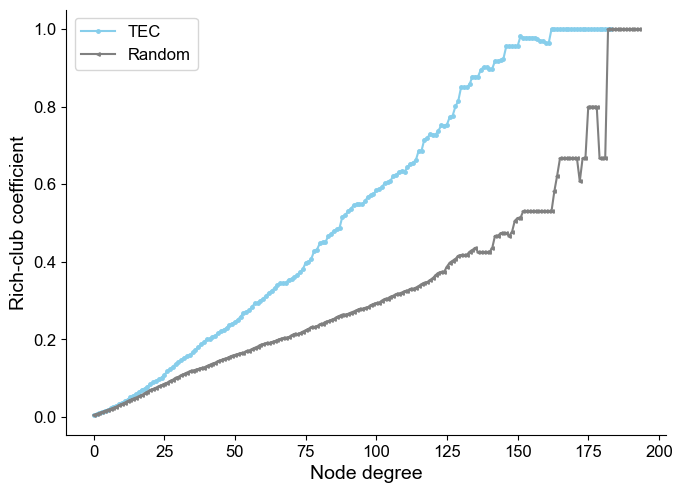

In [20]:
plt.figure(figsize=(6, 4.25))
plt.plot(degrees, coeffs, marker='o', markersize=2.5, color='skyblue', label='TEC')
plt.plot(rand_degrees, rand_coeffs, marker='<', markersize=2.5, color='grey', label='Random')
plt.legend(prop=LEGENDFONT)

plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1g.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Node degree", **LABELFONT)
    plt.ylabel("Rich-club coefficient", **LABELFONT)
plt.show()

#### Figure 1h: Shortest path distribution

In [21]:
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, 0.75)
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)
if not nx.is_connected(tec_graph_75):
    tec_cc_75 = max(nx.connected_components(tec_graph_75), key=len)
    tec_graph_75 = tec_graph_75.subgraph(tec_cc_75).copy()  # largest connected component

ws_k = sum(dict(tec_graph_75.degree()).values()) // tec_graph_75.number_of_nodes()
ws_p = 0.01
G_watts_strogatz = nx.watts_strogatz_graph(tec_graph_75.number_of_nodes(), ws_k, ws_p)

In [22]:
tec_path_lengths = dict(nx.all_pairs_shortest_path_length(tec_graph_75))
tec_lengths = [d for lengths in tec_path_lengths.values() for d in lengths.values() if d != 0]

ws_path_lengths = dict(nx.all_pairs_shortest_path_length(G_watts_strogatz))
ws_lengths = [d for lengths in ws_path_lengths.values() for d in lengths.values() if d != 0]

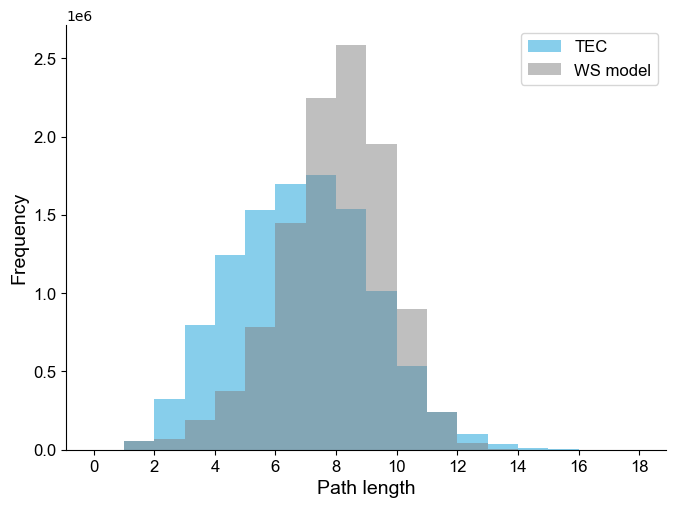

In [23]:
bin_edges = range(0, max(max(tec_lengths), max(ws_lengths)))

plt.figure(figsize=(6, 4.25))
plt.hist(tec_lengths, bins=bin_edges, color="skyblue", label="TEC")
plt.hist(ws_lengths, bins=bin_edges, color="grey", alpha=0.5, label="WS model")
plt.legend(prop=LEGENDFONT)

plt.xticks(ticks=range(0, max(max(tec_lengths), max(ws_lengths)), 2), **TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./figures/figure1h.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Path length", **LABELFONT)
    plt.ylabel("Frequency", **LABELFONT)
plt.show()